In [3074]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import psycopg2
import textatistic
import seaborn as sbn
import requests
from bs4 import BeautifulSoup
import re
import string
import random
from collections import Counter
from altair import *
from nltk.corpus import stopwords
from nltk import tokenize
import os
import math
import textblob
from scipy.misc import imread
from wordcloud import *
import numpy as np
from numpy import *
import operator
import json
matplotlib.style.use('ggplot')
py.offline.init_notebook_mode()
from IPython.display import HTML

In [3075]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Does Doping Have an Effect on Olympic Performance?

Recently, the International Olympic Committee cracked down on Russia for its widespread doping at the 2014 Winter Olympic Games in Sochi. Russia will be banned for the upcoming 2018 Winter Olympics in Pyeongchang, South Korea. Because I used a dataset compiling all the Olympic medals ever won through the 2014 games for my midterm project, I decided to stick with that dataset for this project to explore the affect of doping on Olympic performance. The first thing I explored was the doping history of Russia during the Summer Olympics. This data showed that when more athletes were caught doping, Russia actually did not win as many medals as compared to years when not as many people were caught. This is because the dataset used does not contain the medals won by athletes who were later stripped of their medals. Therefore, it can be proven that doping affected the medal count. The same can be said for Russian Winter Olympic performance. This is extremely evident in 2014 when their medal count spiked as well as the number of athletes who were caught. The reason for this is because the 2014 data contained the athletes who had been caught doping. This further explains doping's affect on performance. The next thing analyzed was the percentage of medals won by countries with doping athletes. Generally, for both the Summer and Winter Olympic Games, as the number of athletes caught doping increased, so did the percentage of medals won by their countries. Lastly, maps were created to measure how many athletes from each country were caught doping, and how many athletes from each country were stripped of their Olympic medals. These maps showed that doping was much more prevalent in the Summer Olympics than the Winter Olympics. In both, doping was the most prevalent in Eastern Europe, especially Russia. Russia had the most athletes caught and stripped of medals in every map. From the data used and the analyzation techniques, it can be proven that doping has an effect on the amount of medals won in the Olympics.

In [3076]:
summerdata = pd.read_csv('/home/students/longca04/DS320/DS320_Project_Medal_Data.csv')

In [3077]:
winterdata = pd.read_csv('/home/students/longca04/DS320/DS320_Project_WinterMedal_Data.csv')

In [3078]:
countrydata = pd.read_csv('/home/students/longca04/DS320/DS320_Project_Country_Data.csv')

In [3079]:
strippeddata = pd.read_csv('/home/students/longca04/DS320/summerdoping.csv')

In [3080]:
strippeddata2 = pd.read_csv('/home/students/longca04/DS320/winterdoping.csv')

In [3081]:
countrydata = countrydata.rename(columns={'Country': 'Name', 'Code': 'Country', 'GDP per Capita': 'GDP_per_Capita'})

In [3082]:
summerdata1 = pd.merge(summerdata, countrydata)

In [3083]:
summerdata1 = summerdata1[summerdata1.Year > 1967]

In [3084]:
winterdata1 = pd.merge(winterdata, countrydata)

In [3085]:
winterdata1 = winterdata1[winterdata1.Year > 1967]

In [3086]:
russiasummer = summerdata1[summerdata1.Name == 'Russia']

In [3087]:
russiasummercount = pd.crosstab(russiasummer.Year,russiasummer.Medal)

In [3088]:
russiasummercount = russiasummercount[['Gold', 'Silver', 'Bronze']]

In [3089]:
russiasummercount['Total'] = russiasummercount.Gold + russiasummercount.Silver + russiasummercount.Bronze

In [3090]:
russiasummercount = russiasummercount.reset_index().sort_values('Year')

In [3091]:
russiastripped = strippeddata[strippeddata.Name == 'Russia']

In [3092]:
russiasummergraphdata = pd.merge(russiasummercount,russiastripped)

## Russia Summer Olympic Medal Count and Doping Data

In [3093]:
russiasummergraphdata

Year  Gold  Silver  Bronze  Total    Name  People_Caught  Medals_Stripped
0  1996    36      45      34    115  Russia              1                0
1  2000    66      68      54    188  Russia              1                0
2  2004    47      49      96    192  Russia              5                3
3  2008    43      44      56    143  Russia             19               15
4  2012    47      32      51    130  Russia             34               15

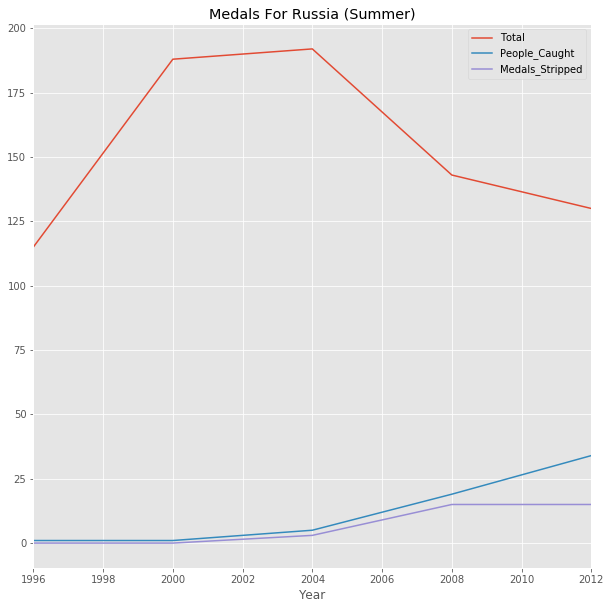

In [3094]:
russiasummergraphdata.plot(x='Year',y=['Total','People_Caught','Medals_Stripped'],title='Medals For Russia (Summer)',figsize=(10,10))

The first Russian Summer Olympic data this dataset gives is from the year 1996. In this year, Russia won 115 total medals. Also during that year, only one Russian athlete was caught doping and zero medals were taken away. Because of this low medal count, Russia was not satisfied with their performance at the 1996 Olympic games, likely prompting more doping to occur. In 2000, their medal count shot up to 188 medals. Only one Russian athlete was caught doping, but this athlete did not win a medal, so no medals were taken away. The 2004 Olympics was more of the same. Russia brought home 192 medals. Only five of their athletes had positive doping tests, and only three medals were taken away. These two years experienced growth because Russia was likely doping as a whole and not getting caught. Their 2008 total dropped to 143. In this year, 19 Russian athletes were caught doping and 15 medals were taken away. 2012 was similar. 130 total medals were won by Russia, while 34 of their athletes were caught doping and 15 medals were taken away. This data shows that in 1996, not as many medals were won due to very little doping. In 2000 and 2004, doping was not monitored as well and the Russians won more medals because of it. In 2008 and 2012 doping was more heavily looked into. Therefore, the Russians won medals, but some of them were taken away because of positive doping tests.

In [3095]:
russiawinter = winterdata1[winterdata1.Name == 'Russia']

In [3096]:
russiawintercount = pd.crosstab(russiawinter.Year,russiawinter.Medal)

In [3097]:
russiawintercount = russiawintercount[['Gold', 'Silver', 'Bronze']]

In [3098]:
russiawintercount['Total'] = russiawintercount.Gold + russiawintercount.Silver + russiawintercount.Bronze

In [3099]:
russiawintercount = russiawintercount.reset_index().sort_values('Year')

In [3100]:
russiastripped2 = strippeddata2[strippeddata2.Name == 'Russia']

In [3101]:
russiastripped3 = pd.DataFrame({'Year': [1994, 1998, 2006, 2010,], 'Name': ['Russia','Russia','Russia','Russia'],
              'People_Caught': [0, 0, 0, 0], 'Medals_Stripped': [0, 0, 0, 0]})

In [3102]:
russiastripped2 = russiastripped2.append(russiastripped3)

In [3103]:
russiastripped2 = russiastripped2.drop_duplicates()

In [3104]:
russiastripped2 = russiastripped2.sort_values('Year')

In [3105]:
russiawintergraphdata = pd.merge(russiawintercount,russiastripped2)

## Russia Summer Olympic Medal Count and Doping Data

In [3106]:
russiawintergraphdata

Year  Gold  Silver  Bronze  Total  Medals_Stripped    Name  People_Caught
0  1994    19      13       4     36                0  Russia              0
1  1998    14      33       6     53                0  Russia              0
2  2002     6       5      29     40                5  Russia              3
3  2006    16      12      13     41                1  Russia              1
4  2006    16      12      13     41                0  Russia              0
5  2010     6       5      14     25                0  Russia              0
6  2014    33      22      13     68               16  Russia             27

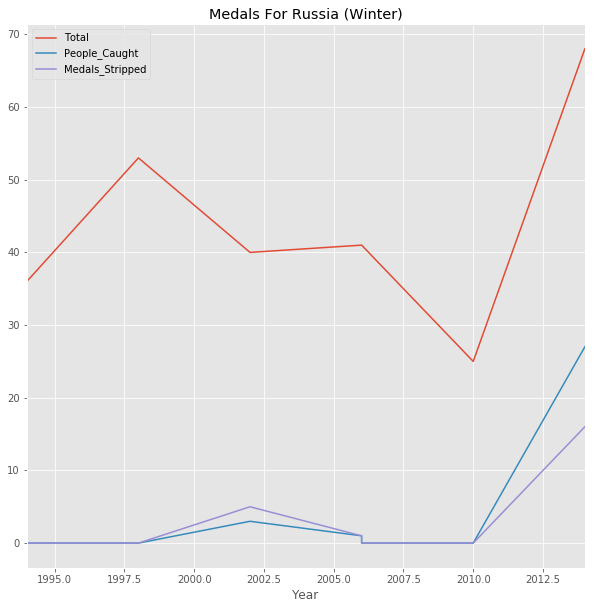

In [3107]:
russiawintergraphdata.plot(x='Year',y=['Total', 'People_Caught', 'Medals_Stripped'],title='Medals For Russia (Winter)',figsize=(10,10))

In the years 1994 and 1998, Russia had no problems with doping. They won 36 and 53 medals, respectively. In 2002, the number of medals decreased to 40. In this year, three athletes were caught doping and five medals were taken away explaining why this number is lower. 41 medals were won in 2006, only one athlete was caught doping, and one medal was stripped. Russia only earned 25 medals in 2010. Three people were caught doping, but no medals were taken away. This plot shows a huge spike in the year 2014. This data was compiled before the decision to take medals away for doping during these games. In this year, 68 medals were won by Russia, and 27 of their athletes were caught for doping. This took away 16 of their medals. If the data was updated, it would show 52 medals won. This would still be the highest value for Russia, however it would be much closer to normal.

In [3108]:
cheat1968 = summerdata1[summerdata1.Year == 1968]
cheat1968 = cheat1968[cheat1968.Name == 'Sweden']

In [3109]:
cheat1972 = summerdata1[summerdata1.Year == 1972]
cheat1972us = cheat1972[cheat1972.Name == 'United States']
cheat1972neth = cheat1972[cheat1972.Name == 'Netherlands']
cheat1972mong = cheat1972[cheat1972.Name == 'Mongolia']
cheat1972esp = cheat1972[cheat1972.Name == 'Spain']
cheat1972 = cheat1972us.append(cheat1972neth)
cheat1972 = cheat1972.append(cheat1972mong)
cheat1972 = cheat1972.append(cheat1972esp)

In [3110]:
cheat1976 = summerdata1[summerdata1.Year == 1976]
cheat1976bul = cheat1976[cheat1976.Name == 'Bulgaria']
cheat1976pol = cheat1976[cheat1976.Name == 'Poland']
cheat1976 = cheat1976bul.append(cheat1976pol)

In [3111]:
cheat1984 = summerdata1[summerdata1.Year == 1984]
cheat1984swe = cheat1984[cheat1984.Name == 'Sweden']
cheat1984fin = cheat1984[cheat1984.Name == 'Finland']
cheat1984 = cheat1984swe.append(cheat1984fin)

In [3112]:
cheat1988 = summerdata1[summerdata1.Year == 1988]
cheat1988can = cheat1988[cheat1988.Name == 'Canada']
cheat1988bul = cheat1988[cheat1988.Name == 'Bulgaria']
cheat1988hun = cheat1988[cheat1988.Name == 'Hungary']
cheat1988 = cheat1988bul.append(cheat1988can)
cheat1988 = cheat1988.append(cheat1988hun)

In [3113]:
cheat2000 = summerdata1[summerdata1.Year == 2000]
cheat2000us = cheat2000[cheat2000.Name == 'United States']
cheat2000bul = cheat2000[cheat2000.Name == 'Bulgaria']
cheat2000ger = cheat2000[cheat2000.Name == 'Germany']
cheat2000rom = cheat2000[cheat2000.Name == 'Romania']
cheat2000arm = cheat2000[cheat2000.Name == 'Armenia']
cheat2000 = cheat2000us.append(cheat2000bul)
cheat2000 = cheat2000.append(cheat2000ger)
cheat2000 = cheat2000.append(cheat2000rom)
cheat2000 = cheat2000.append(cheat2000arm)

In [3114]:
cheat2004 = summerdata1[summerdata1.Year == 2004]
cheat2004us = cheat2004[cheat2004.Name == 'United States']
cheat2004ire = cheat2004[cheat2004.Name == 'Ireland']
cheat2004hun = cheat2004[cheat2004.Name == 'Hungary']
cheat2004ukr = cheat2004[cheat2004.Name == 'Ukraine']
cheat2004ger = cheat2004[cheat2004.Name == 'Germany']
cheat2004rus = cheat2004[cheat2004.Name == 'Russia']
cheat2004bel = cheat2004[cheat2004.Name == 'Belarus']
cheat2004gre = cheat2004[cheat2004.Name == 'Greece']
cheat2004 = cheat2004us.append(cheat2004ire)
cheat2004 = cheat2004.append(cheat2004hun)
cheat2004 = cheat2004.append(cheat2004ukr)
cheat2004 = cheat2004.append(cheat2004ger)
cheat2004 = cheat2004.append(cheat2004rus)
cheat2004 = cheat2004.append(cheat2004bel)
cheat2004 = cheat2004.append(cheat2004gre)

In [3115]:
cheat2008 = summerdata1[summerdata1.Year == 2008]
cheat2008arm = cheat2008[cheat2008.Name == 'Armenia']
cheat2008aze = cheat2008[cheat2008.Name == 'Azerbaijan']
cheat2008bah = cheat2008[cheat2008.Name == 'Bahrain']
cheat2008bel = cheat2008[cheat2008.Name == 'Belarus']
cheat2008chi = cheat2008[cheat2008.Name == 'China']
cheat2008cub = cheat2008[cheat2008.Name == 'Cuba']
cheat2008gre = cheat2008[cheat2008.Name == 'Greece']
cheat2008ita = cheat2008[cheat2008.Name == 'Italy']
cheat2008jam = cheat2008[cheat2008.Name == 'Jamaica']
cheat2008kaz = cheat2008[cheat2008.Name == 'Kazakhstan']
cheat2008nko = cheat2008[cheat2008.Name == 'North Korea']
cheat2008nor = cheat2008[cheat2008.Name == 'Norway']
cheat2008tur = cheat2008[cheat2008.Name == 'Turkey']
cheat2008rus = cheat2008[cheat2008.Name == 'Russia']
cheat2008ukr = cheat2008[cheat2008.Name == 'Ukraine']
cheat2008uzb = cheat2008[cheat2008.Name == 'Uzbekistan']
cheat2008 = cheat2008arm.append(cheat2008aze)
cheat2008 = cheat2008.append(cheat2008bah)
cheat2008 = cheat2008.append(cheat2008bel)
cheat2008 = cheat2008.append(cheat2008chi)
cheat2008 = cheat2008.append(cheat2008cub)
cheat2008 = cheat2008.append(cheat2008gre)
cheat2008 = cheat2008.append(cheat2008ita)
cheat2008 = cheat2008.append(cheat2008jam)
cheat2008 = cheat2008.append(cheat2008kaz)
cheat2008 = cheat2008.append(cheat2008nko)
cheat2008 = cheat2008.append(cheat2008nor)
cheat2008 = cheat2008.append(cheat2008tur)
cheat2008 = cheat2008.append(cheat2008rus)
cheat2008 = cheat2008.append(cheat2008ukr)
cheat2008 = cheat2008.append(cheat2008uzb)

In [3116]:
cheat2012 = summerdata1[summerdata1.Year == 2012]
cheat2012arm = cheat2012[cheat2012.Name == 'Armenia']
cheat2012bel = cheat2012[cheat2012.Name == 'Belarus']
cheat2012kaz = cheat2012[cheat2012.Name == 'Kazakhstan']
cheat2012mol = cheat2012[cheat2012.Name == 'Moldova']
cheat2012rus = cheat2012[cheat2012.Name == 'Russia']
cheat2012tur = cheat2012[cheat2012.Name == 'Turkey']
cheat2012ukr = cheat2012[cheat2012.Name == 'Ukraine']
cheat2012us = cheat2012[cheat2012.Name == 'United States']
cheat2012uzb = cheat2012[cheat2012.Name == 'Uzbekistan']
cheat2012 = cheat2012arm.append(cheat2012bel)
cheat2012 = cheat2012.append(cheat2012kaz)
cheat2012 = cheat2012.append(cheat2012mol)
cheat2012 = cheat2012.append(cheat2012rus)
cheat2012 = cheat2012.append(cheat2012tur)
cheat2012 = cheat2012.append(cheat2012ukr)
cheat2012 = cheat2012.append(cheat2012us)
cheat2012 = cheat2012.append(cheat2012uzb)

In [3117]:
cheaters = cheaters.append(cheat1972)
cheaters = cheaters.append(cheat1976)
cheaters = cheaters.append(cheat1984)
cheaters = cheaters.append(cheat1988)
cheaters = cheaters.append(cheat2000)
cheaters = cheaters.append(cheat2004)
cheaters = cheaters.append(cheat2008)
summercheaters = cheaters.append(cheat2012)

In [3118]:
summercheaters = summercheaters.drop_duplicates()

In [3119]:
summercheaterscount = pd.crosstab(summercheaters.Year, summercheaters.Medal)

In [3120]:
summercheaterscount = summercheaterscount[['Gold', 'Silver', 'Bronze']]

In [3121]:
summercheaterscount['Total'] = summercheaterscount.Gold + summercheaterscount.Silver + summercheaterscount.Bronze

In [3122]:
summerdata1list = summerdata1['Year'].tolist()

In [3123]:
summermedalslist = []
for i in summerdata1list:
    if i not in summermedalslist:
        summermedalslist.append(i)

In [3124]:
yearsdf = pd.DataFrame(summerdata1['Year'])

In [3125]:
for i in summermedalslist:
    summercount = yearsdf[yearsdf.Year == i].count()
    print(summercount)

Year    662
dtype: int64
Year    643
dtype: int64
Year    664
dtype: int64
Year    504
dtype: int64
Year    841
dtype: int64
Year    1418
dtype: int64
Year    1795
dtype: int64
Year    1943
dtype: int64
Year    1959
dtype: int64
Year    2005
dtype: int64
Year    1885
dtype: int64
Year    1109
dtype: int64


In [3126]:
medalchancelist = [662, 643, 664, 504, 1109, 841, 1418, 1795, 1943, 1959, 2005, 1885]

In [3127]:
dummy = {'Year': [1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012], 'Opportunities': medalchancelist}

In [3128]:
dummy = pd.DataFrame(dummy)

In [3129]:
summercheaterscount = summercheaterscount.reset_index()

In [3130]:
summercheaterscount = summercheaterscount[['Year','Gold','Silver','Bronze','Total']]

In [3131]:
summercheaterscount = pd.merge(dummy, summercheaterscount)

In [3132]:
summercheaterscount = summercheaterscount[['Year','Gold','Silver','Bronze','Total', 'Opportunities']]

In [3133]:
summercheaterscount['Percentage'] = summercheaterscount['Total'] / summercheaterscount['Opportunities'] * 100

## Data for Percentage of Medals Won By Countries With Doping Athletes (Summer Olympics)

In [3134]:
summercheaterscount

Year  Gold  Silver  Bronze  Total  Opportunities  Percentage
0  1972    56      61      46    163            643   25.349922
1  1976    26      42      44    112            664   16.867470
2  1984     7      20      17     44           1109    3.967538
3  1988    34      28      44    106            841   12.604043
4  2000   166      96     120    382           1943   19.660319
5  2004   247     213     281    741           1959   37.825421
6  2008   177     180     213    570           2005   28.428928
7  2012   211     109     125    445           1885   23.607427

In [3135]:
in72 = strippeddata[strippeddata.Year == 1972]
in72 = in72['People_Caught'].sum()

In [3136]:
in76 = strippeddata[strippeddata.Year == 1976]
in76 = in76['People_Caught'].sum()

In [3137]:
in80 = strippeddata[strippeddata.Year == 1980]
in80 = in80['People_Caught'].sum()

In [3138]:
in84 = strippeddata[strippeddata.Year == 1984]
in84 = in84['People_Caught'].sum()

In [3139]:
in88 = strippeddata[strippeddata.Year == 1988]
in88 = in88['People_Caught'].sum()

In [3140]:
in92 = strippeddata[strippeddata.Year == 1992]
in92 = in92['People_Caught'].sum()

In [3141]:
in96 = strippeddata[strippeddata.Year == 1996]
in96 = in96['People_Caught'].sum()

In [3142]:
in00 = strippeddata[strippeddata.Year == 2000]
in00 = in00['People_Caught'].sum()

In [3143]:
in04 = strippeddata[strippeddata.Year == 2004]
in04 = in04['People_Caught'].sum()

In [3144]:
in08 = strippeddata[strippeddata.Year == 2008]
in08 = in08['People_Caught'].sum()

In [3145]:
in12 = strippeddata[strippeddata.Year == 2012]
in12 = in12['People_Caught'].sum()

In [3146]:
summerathletescaught = pd.DataFrame({'Year': [1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012],
                                     'Athletes_Caught': [in72, in76, in80, in84, in88, in92, in96, in00, in04, in08, in12]})

In [3147]:
summercaught = pd.merge(summercheaterscount, summerathletescaught)

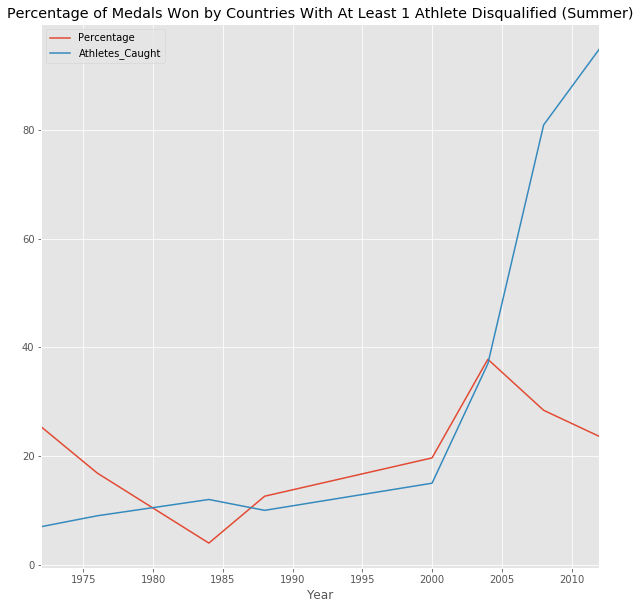

In [3148]:
summercaught.plot(x='Year',y=['Percentage', 'Athletes_Caught'],title='Percentage of Medals Won by Countries With At Least 1 Athlete Disqualified (Summer)',figsize=(10,10))

This plot shows the number of medals won by countries who had disqualified athletes due to doping and the number of athletes with medals that were taken away. A disqualification means that a medal was taken away after the Olympics were over. This data does not include medals that were taken away. In 1972, roughly 25% of medalists came from countries who had at least one disqualification. However, this point is an outlier because there was one person from the United States who was disqualified and the United States won a huge portion of the medals that year. The years 1976, 1980, and 1984 contained two, zero, and two countries with disqualified athletes. 1988 had three countries with disqualified athletes. The 1992 and 1996 games had zero disqualified athletes, and five countries had disqualified athletes in 2000. The plot spikes to almost 39% in 2004. In this year, eight countries had athletes who were disqualified because of doping. This trend continued in 2008 when 16 countries had disqualified athletes. There were nine countries who had disqualified athletes in 2012, which resulted in roughly 24% of all medal winners. This plot demonstrates that when there are more countries with athletes who are doping, that country tends to do better as a whole in the Olympics. A possible explanation to this is that there are other athletes from that country who are doping, but do not get caught. Also, countries such as the United States and Russia had not begun to dope until recently, causing a spike in the data. This plot is not the best interpretation of how doping affects the amount of medals won, however, generally the percentage of possible medals won increases as the amount of athletes who were stripped of their medals increases.

In [3149]:
boo1984 = winterdata1[winterdata1.Year == 1984]
boo1984 = boo1984[boo1984.Name == 'Mongolia']

In [3150]:
boo1988 = winterdata1[winterdata1.Year == 1988]
boo1988 = boo1988[boo1988.Name == 'Poland']

In [3151]:
boo2002 = winterdata1[winterdata1.Year == 2002]
boo2002uki = boo2002[boo2002.Name == 'United Kingdom']
boo2002rus = boo2002[boo2002.Name == 'Russia']
boo2002esp = boo2002[boo2002.Name == 'Spain']
boo2002 = boo2002uki.append(boo2002rus)
boo2002 = boo2002.append(boo2002esp)

In [3152]:
boo2006 = winterdata1[winterdata1.Year == 2006]
boo2006 = boo2006[boo2006.Name == 'Russia']

In [3153]:
boo2014 = winterdata1[winterdata1.Year == 2014]
boo2014swe = boo2014[boo2014.Name == 'Sweden']
boo2014rus = boo2014[boo2014.Name == 'Russia']
boo2014 = boo2014swe.append(boo2014rus)

In [3154]:
boo = boo1984.append(boo1988)
boo = boo.append(boo2002)
boo = boo.append(boo2006)
wintercheaters = boo.append(boo2014)

In [3155]:
wintercheaters = wintercheaters.drop_duplicates()

In [3156]:
wintercheaterscount = pd.crosstab(wintercheaters.Year, wintercheaters.Medal)

In [3157]:
wintercheaterscount = wintercheaterscount[['Gold', 'Silver', 'Bronze']]

In [3158]:
wintercheaterscount['Total'] = wintercheaterscount.Gold + wintercheaterscount.Silver + wintercheaterscount.Bronze

In [3159]:
winterdata1list = winterdata1['Year'].tolist()

In [3160]:
wintermedalslist = []
for i in winterdata1list:
    if i not in wintermedalslist:
        wintermedalslist.append(i)

In [3161]:
winteryearsdf = pd.DataFrame(winterdata1['Year'])

In [3162]:
for i in wintermedalslist:
    wintercount = winteryearsdf[winteryearsdf.Year == i].count()
    print(wintercount)

Year    123
dtype: int64
Year    105
dtype: int64
Year    72
dtype: int64
Year    116
dtype: int64
Year    96
dtype: int64
Year    139
dtype: int64
Year    237
dtype: int64
Year    343
dtype: int64
Year    447
dtype: int64
Year    481
dtype: int64
Year    531
dtype: int64
Year    529
dtype: int64
Year    612
dtype: int64


In [3163]:
wintermedalchancelist = [123, 105, 72, 116, 96, 139, 237, 343, 447, 481, 531, 529, 612]

In [3164]:
winterdummy = {'Year': wintermedalslist, 'Opportunities': wintermedalchancelist}

In [3165]:
winterdummy = pd.DataFrame(winterdummy)

In [3166]:
wintercheaterscount = wintercheaterscount.reset_index()

In [3167]:
wintercheaterscount = wintercheaterscount[['Year','Gold','Silver','Bronze','Total']]

In [3168]:
wintercheaterscount = pd.merge(winterdummy, wintercheaterscount)

In [3169]:
wintercheaterscount = wintercheaterscount[['Year','Gold','Silver','Bronze','Total', 'Opportunities']]

In [3170]:
wintercheaterscount['Percentage'] = wintercheaterscount['Total'] / wintercheaterscount['Opportunities'] * 100

## Data for Percentage of Medals Won By Countries With Doping Athletes (Winter Olympics)

In [3171]:
wintercheaterscount

Year  Gold  Silver  Bronze  Total  Opportunities  Percentage
0  2002    11       5      30     46            481    9.563410
1  2006    16      12      13     41            531    7.721281
2  2014    41      57      25    123            612   20.098039

In [3172]:
zeros = {'Year': [1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2010], 'Gold': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              'Silver': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Bronze': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Total': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              'Opportunities': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Percentage': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [3173]:
zeros = pd.DataFrame(zeros)

In [3174]:
zeros = zeros[['Year', 'Gold', 'Silver', 'Bronze', 'Total', 'Opportunities', 'Percentage']]

In [3175]:
wintercheaterscount = wintercheaterscount.append(zeros)

In [3176]:
wintercheaterscount = wintercheaterscount.sort_values('Year')

In [3177]:
win72 = strippeddata2[strippeddata2.Year == 1972]
win72 = win72['People_Caught'].sum()

In [3178]:
win76 = strippeddata2[strippeddata2.Year == 1976]
win76 = win76['People_Caught'].sum()

In [3179]:
win80 = strippeddata2[strippeddata2.Year == 1980]
win80 = win80['People_Caught'].sum()

In [3180]:
win84 = strippeddata2[strippeddata2.Year == 1984]
win84 = win84['People_Caught'].sum()

In [3181]:
win88 = strippeddata2[strippeddata2.Year == 1988]
win88 = win88['People_Caught'].sum()

In [3182]:
win92 = strippeddata2[strippeddata2.Year == 1992]
win92 = win92['People_Caught'].sum()

In [3183]:
win94 = strippeddata2[strippeddata2.Year == 1994]
win94 = win94['People_Caught'].sum()

In [3184]:
win98 = strippeddata2[strippeddata2.Year == 1998]
win98 = win98['People_Caught'].sum()

In [3185]:
win02 = strippeddata2[strippeddata2.Year == 2002]
win02 = win02['People_Caught'].sum()

In [3186]:
win06 = strippeddata2[strippeddata2.Year == 2006]
win06 = win06['People_Caught'].sum()

In [3187]:
win10 = strippeddata2[strippeddata2.Year == 2010]
win10 = win10['People_Caught'].sum()

In [3188]:
win14 = strippeddata2[strippeddata2.Year == 2014]
win14 = win14['People_Caught'].sum()

In [3189]:
winterathletescaught = pd.DataFrame({'Year': [1972, 1976, 1980, 1984, 1988, 1992, 1994, 2002, 2006, 2010, 2014],
                                     'Athletes_Caught': [win72, win76, win80, win84, win88, win92, win94, win02, win06, win10,
                                                         win14]})

In [3190]:
wintercaught = pd.merge(wintercheaterscount, winterathletescaught)

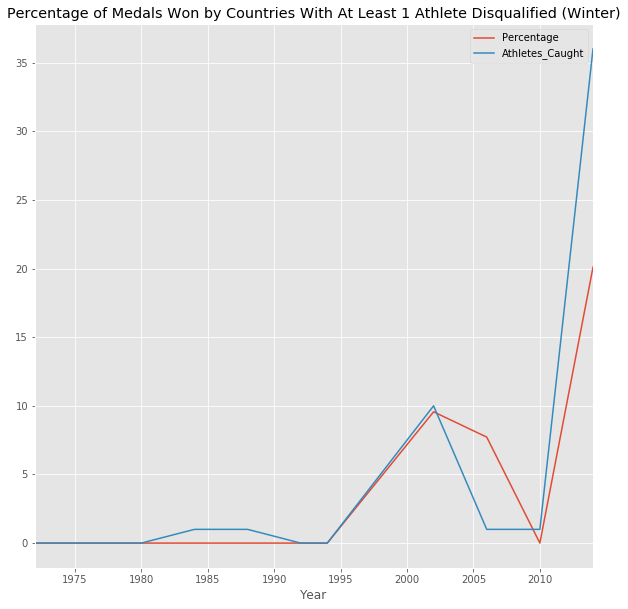

In [3191]:
wintercaught.plot(x='Year',y=['Percentage', 'Athletes_Caught'],
                  title='Percentage of Medals Won by Countries With At Least 1 Athlete Disqualified (Winter)',figsize=(10,10))

In the Winter Olympics, there were no athletes in the from any current countries who had been stripped of a medal because of doping until the year 2002, however there was one athlete in each 1984 and 1988 who was caught but did not win a medal. In 2002, Russia had five total medals stripped and Spain had three. Those two countries accounted for a little less than 10% of the total medal count. One Russian medal was taken away in 2006, and Russia earned almost 8% of the total medals in that year. The data went back down to zero in 2010 because there were no medals taken away due to doping. In 2014, the Winter Olympics were hosted in Russia. In that year, 16 Russians had medals stripped because they were caught doping. There was also one Swedish athlete who was caught and stripped of a medal. In total, this made up roughly 20% of the total medals. The data from the Winter Olympics shows that as the amount of athletes caught doping increases, the so does the percentage of medals won by countries with doping athletes.

## Maps of countries doping at the Olympics

In [3192]:
choroplethdata = pd.DataFrame(strippeddata.groupby('Name')['Medals_Stripped'].sum())

In [3193]:
choroplethdata = choroplethdata.reset_index()

In [3194]:
choroplethdata2 = pd.DataFrame(strippeddata.groupby('Name')['People_Caught'].sum())

In [3195]:
choroplethdata2 = choroplethdata2.reset_index()

In [3196]:
choroplethdata3 = pd.DataFrame(strippeddata2.groupby('Name')['Medals_Stripped'].sum())

In [3197]:
choroplethdata3 = choroplethdata3.reset_index()

In [3198]:
choroplethdata4 = pd.DataFrame(strippeddata2.groupby('Name')['People_Caught'].sum())

In [3199]:
choroplethdata4 = choroplethdata4.reset_index()

In [3200]:
countries = pd.read_csv("bigcountrylist.csv")

In [3201]:
countries = countries[['Country','Name']]

In [3202]:
choroplethlist = choroplethdata['Name'].tolist()

In [3203]:
hidelength = len(choroplethlist)

In [3204]:
choroplethhelp = countries['Name'].tolist()

In [3205]:
for i in choroplethhelp:
    if i not in choroplethlist:
        choroplethlist.append(i)

In [3206]:
hidelength2 = len(choroplethlist)

In [3207]:
zeroslistwith141entries = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [3208]:
medalsstrippedlist = choroplethdata['Medals_Stripped'].tolist()

In [3209]:
allmedalsstrippedlist = medalsstrippedlist + zeroslistwith141entries

In [3210]:
summerchoropleth = pd.DataFrame({'Name': choroplethlist, 'Medals_Stripped': allmedalsstrippedlist})

In [3211]:
summerchoropleth = pd.merge(summerchoropleth, countries)

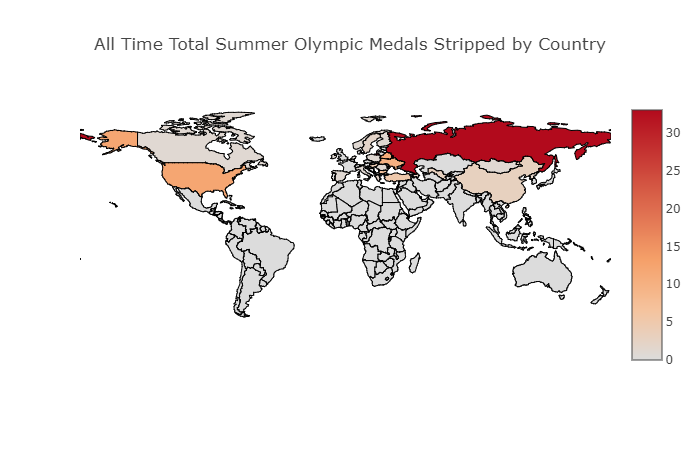

In [3212]:
choroplethlist2 = choroplethdata2['Name'].tolist()

In [3213]:
hidelength3 = len(choroplethlist2)

In [3214]:
choroplethhelp2 = countries['Name'].tolist()

In [3215]:
for i in choroplethhelp2:
    if i not in choroplethlist2:
        choroplethlist2.append(i)

In [3216]:
hidelength4 = len(choroplethlist2)

In [3217]:
peoplecaughtlist = choroplethdata2['People_Caught'].tolist()

In [3218]:
allpeoplecaughtlist = peoplecaughtlist + zeroslistwith141entries

In [3219]:
summerchoropleth2 = pd.DataFrame({'Name': choroplethlist2, 'People_Caught': allpeoplecaughtlist})

In [3220]:
summerchoropleth2 = pd.merge(summerchoropleth2, countries)

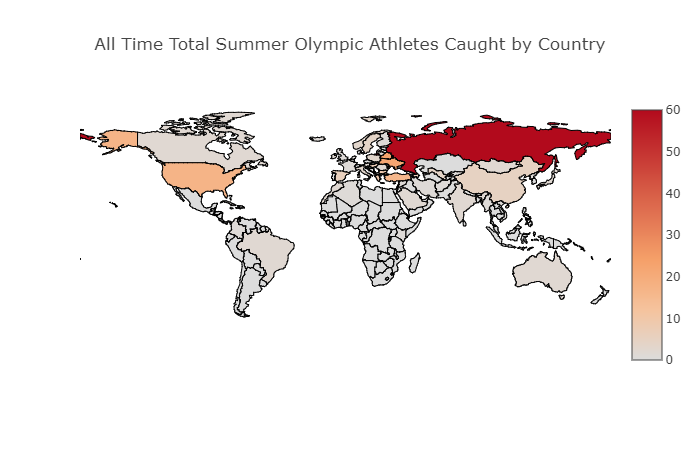

In [3221]:
choroplethlist3 = choroplethdata3['Name'].tolist()

In [3222]:
hidelength5 = len(choroplethlist3)

In [3223]:
choroplethhelp3 = countries['Name'].tolist()

In [3224]:
for i in choroplethhelp3:
    if i not in choroplethlist3:
        choroplethlist3.append(i)

In [3225]:
hidelength6 = len(choroplethlist3)

In [3226]:
zeroslistwith187entries = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [3227]:
medalsstrippedlist2 = choroplethdata3['Medals_Stripped'].tolist()

In [3228]:
allmedalsstrippedlist2 = medalsstrippedlist2 + zeroslistwith187entries

In [3229]:
winterchoropleth = pd.DataFrame({'Name': choroplethlist3, 'Medals_Stripped': allmedalsstrippedlist2})

In [3230]:
winterchoropleth = pd.merge(winterchoropleth, countries)

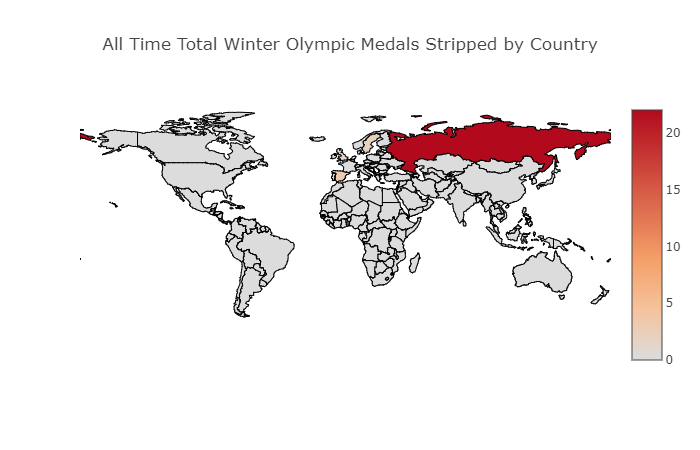

In [3231]:
choroplethlist4 = choroplethdata3['Name'].tolist()

In [3232]:
hidelength7 = len(choroplethlist4)

In [3233]:
choroplethhelp4 = countries['Name'].tolist()

In [3234]:
for i in choroplethhelp4:
    if i not in choroplethlist4:
        choroplethlist4.append(i)

In [3235]:
hidelength8 = len(choroplethlist4)

In [3236]:
peoplecaughtlist2 = choroplethdata4['People_Caught'].tolist()

In [3237]:
allpeoplecaughtlist2 = peoplecaughtlist2 + zeroslistwith187entries

In [3238]:
winterchoropleth2 = pd.DataFrame({'Name': choroplethlist4, 'People_Caught': allpeoplecaughtlist2})

In [3239]:
winterchoropleth2 = pd.merge(winterchoropleth2, countries)

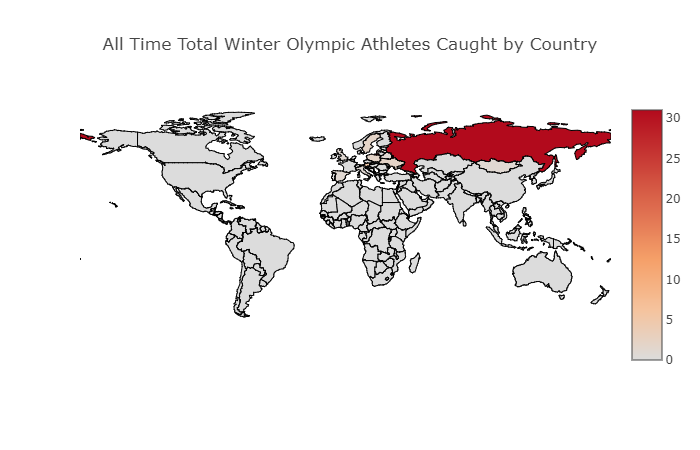

These maps show the total amount of medals stripped per country and the amount of total athletes caught from each country in every Summer and Winter Olympic Games. The Summer Olympics have had more ahletes get caught for doping and had more athletes who have been stripped of medals. The Summer Olympics also have had more doping issues worldwide. There has been at least one athlete who has been caught doping from each continent in the Summer Olympics. Doping has occurred in the Winter Olympics too, it just has not been as prevalent. All maps show that doping is most prevalent in the eastern European countries. Russia has been the country with the most athletes caught doping and the most medals stripped in every map.